# 1-1

### くじ引き

In [59]:
n = int(input())
m = int(input())
k = input().split()
k = [int(i) for i in k]

3
10
2 3 5


In [60]:
def kujibiki(n, m, k):
    f = 0
    for a in range(n):
        for b in range(n):
            for c in range(n):
                for d in range(n):
                    if (k[a] + k[b] + k[c] + k[d]) == m:
                        f = True
    if f:
        print("Yes")
    else:
        print("No")
kujibiki(n, m, k)

Yes


# 1-6

## 三角形

In [41]:
n = int(input())
a = input().split()
a = [int(i) for i in a]

5
2 3 4 5 10


In [44]:
def tri_max(a, n):
    a = sorted(a)
    max_len = 0
    for i in range(n):
        for j in range(i+1,n):
            for k in range(j+1,n):
                #三角形を形成するのか判定
                if a[k] < a[i] + a[j]:
                    t = a[k] + a[i] + a[j]
                    max_len = max(t, max_len)
    print(max_len)
tri_max(a, n)

12


## Ants

In [3]:
L = int(input())
n = int(input())
x = input().split()
x = [int(i) for i in x]

10
3
2 6 7


In [4]:
#非効率的な方法
import itertools
def ants_1(L, n, x):
    min_time = float("inf")
    max_time = 0
    #左を向いている場合は1,右を向いている場合は0とする
    for i in itertools.product([0,1], repeat=n):
        #jにはantsの左右の向きが格納されている
        time_list = []
        for ind,j in enumerate(list(i)):
            if j:
                time_list.append(x[ind])
            else:
                time_list.append(L-x[ind])
        time = max(time_list)
        min_time = min(min_time, time)
        max_time = max(max_time, time)
    return min_time, max_time
ants_1(L, n, x)

(4, 8)

In [5]:
#効率的な方法
def ants_2(L, n, x):
    # 最小の時間を計算
    min_T = 0
    for i in range(n):
        min_T = max(min_T, min(x[i], L-x[i]))
        
    # 最大の時間を計算
    max_T = 0
    for i in range(n):
        max_T = max(max_T, max(x[i], L-x[i]))
        
    return min_T, max_T
ants_2(L, n, x)

(4, 8)

## ハードルが上がった「くじ引き」

$n^3\log{n}$

In [98]:
n = int(input())
m = int(input())
k = input().split()
k = [int(i) for i in k]

3
10
2 3 5


In [99]:
def binary_search(k,x):
    left = 0
    right = len(k)
    
    while right-left >= 1:
        i = (left + right) // 2
        if k[i] == x:
            return True
        elif k[i] < x:
            left = i + 1
        else:
            right = i
    return False

def kujibiki_binary(n, m, k):
    # O(nlogn)
    k.sort()
    
    # O(n^3 logn)
    f = False
    for a in range(n):
        for b in range(n):
            for c in range(n):
                # O(logn)
                if binary_search(k, m - (k[a] + k[b] + k[c])):
                    f = True
    if f:
        print("Yes")
    else:
        print("No")
kujibiki_binary(n, m, k)

Yes


$n^2\log{n}$

In [49]:
import itertools

def binary_search(k,x):
    left = 0
    right = len(k)
    
    while right-left >= 1:
        i = (left + right) // 2
        if k[i] == x:
            return True
        elif k[i] < x:
            left = i + 1
        else:
            right = i
    return False

def kujibiki_binary_2(n, m, k):
    # CとDを組み合わせてできる数の組合せを保存
    # O(n^2)
    kk = [sum(comb) for comb in list(itertools.combinations(k,2))]
    # O(nlogn)
    kk.sort()
      
    # O(n^2 logn)
    f = False
    for a in range(n):
        for b in range(n):
                # O(logn)
                if binary_search(kk, m - (k[a] + k[b])):
                    f = True
    if f:
        print("Yes")
    else:
        print("No")
kujibiki_binary_2(n, m, k)

Yes


# 計算時間実験

In [58]:
import random
import time

l = list(range(100))

n = 10
m = random.randint(0,100)
k = random.sample(l, n)

%time kujibiki(n, m, k)
%time kujibiki_binary(n, m, k)
%time kujibiki_binary_2(n, m, k)

Yes
CPU times: user 3.8 ms, sys: 889 µs, total: 4.69 ms
Wall time: 5.36 ms
Yes
CPU times: user 2.26 ms, sys: 129 µs, total: 2.39 ms
Wall time: 2.49 ms
Yes
CPU times: user 669 µs, sys: 70 µs, total: 739 µs
Wall time: 742 µs


In [108]:
from tqdm import tqdm_notebook as tqdm

ns = list(range(10,81,10))
m = random.randint(0,100)

time1 = []
time2 = []
time3 = []

for n in tqdm(ns):
    l = list(range(n*10))
    t1 = []
    t2 = []
    t3 = []
    for i in range(5):
        k = random.sample(l, n)
        start = time.time()
        kujibiki(n, m, k)
        end = time.time()
        t1.append(end-start)

        start = time.time()
        kujibiki_binary(n, m, k)
        end = time.time()
        t2.append(end-start)

        start = time.time()
        kujibiki_binary_2(n, m, k)
        end = time.time()
        t3.append(end-start)
    time1.append(sum(t1)/5)
    time2.append(sum(t2)/5)
    time3.append(sum(t3)/5)

No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No



In [109]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

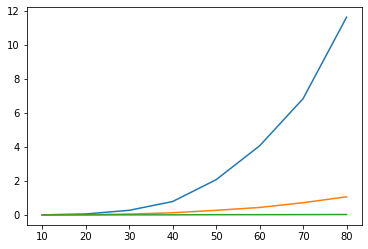

In [110]:
df = pd.DataFrame({"n^3":time1,"n^3logn":time2,"n^2logn":time3})

plt.plot(ns,df)
plt.show()

In [118]:
ns_2 = list(range(100,1001,100))
m = random.randint(0,100)

time2_2 = []
time3_2 = []

for n in tqdm(ns_2):
    print(n)
    l = list(range(n*10))
    t2 = []
    t3 = []
    for i in range(1):
        k = random.sample(l, n)
        start = time.time()
        kujibiki_binary(n, m, k)
        end = time.time()
        t2.append(end-start)

        start = time.time()
        kujibiki_binary_2(n, m, k)
        end = time.time()
        t3.append(end-start)
    time2_2.append(sum(t2)/1)
    time3_2.append(sum(t3)/1)

100
Yes
Yes
200
Yes
Yes
300
No
No
400
Yes
Yes
500
No
No
600
Yes
Yes
700
No
No
800
Yes
Yes
900
Yes
Yes
1000
Yes
Yes



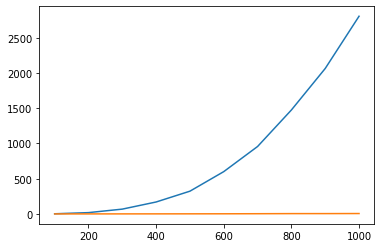

In [119]:
df2 = pd.DataFrame({"n^3logn":time2_2,"n^2logn":time3_2})

plt.plot(ns_2,df2)
plt.show()